In [ ]:
'''Librerías'''
import numpy as np
import matplotlib.pyplot as plt
import pickle # Los modelos antiguos de ML no tienen método save y usan la librearia pickle para poder salvarse y cargarse.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
import keras
from keras.layers import Input, Add, Conv1D, BatchNormalization, Activation, Dense, Flatten, Dropout, AveragePooling1D
from keras.initializers import glorot_uniform
from keras.models import Model,Sequential 

In [ ]:
import random
import pandas as pd
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/SOMDrive/bacteriaID/

/content/drive/MyDrive/SOMDrive/bacteriaID


In [ ]:
'''Datos: Cambiar el acceso a los datos'''
X_fn = './data/X_reference.npy'
y_fn = './data/y_reference.npy'
X = np.load(X_fn)
y = np.load(y_fn)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# redimensionamos los datos para que en lugar de ser un vector lineal de 1000 datos cada característica esté separada
X_tr_cnn = np.reshape(X_train,(X_train.shape[0],1000,1))
y_tr_cnn = np.reshape(y_train,(y_train.shape[0],1))

X_val_cnn = np.reshape(X_test,(X_test.shape[0],1000,1))
y_val_cnn = np.reshape(y_test,(y_test.shape[0],1))

In [ ]:
n_classes = 30
y_tr_cnn_c = keras.utils.to_categorical(y_tr_cnn, n_classes)
y_v_cnn_c = keras.utils.to_categorical(y_val_cnn, n_classes)


In [ ]:
M_input = Input((1000,1))
M = Conv1D(64, 5, strides=1, name='conv1', padding='same', input_shape=(1000,1))(M_input)
M = BatchNormalization(axis=2, epsilon=1e-05, momentum=0.1, name='bn_conv1')(M)
M = Activation('relu')(M)
M = Conv1D(100, 5, strides=1, name='conv2', padding='same', input_shape=(1000,1))(M)
M = BatchNormalization(axis=2, epsilon=1e-05, momentum=0.1, name='bn_conv2')(M)
M = Activation('relu')(M)
M = Conv1D(100, 5, strides=1, name='conv3', padding='same', input_shape=(1000,1))(M)
M = BatchNormalization(axis=2, epsilon=1e-05, momentum=0.1, name='bn_conv3')(M)
M = Activation('relu')(M)
M = Flatten() (M)
M = Dense(500, activation='relu')(M)
M = Dropout(0.5)(M)
M = Dense(n_classes, activation='softmax') (M)

model_cnn2 = Model(inputs=M_input, outputs=M, name='CNN2')
model_cnn2.summary()

Model: "CNN2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1000, 1)]         0         
_________________________________________________________________
conv1 (Conv1D)               (None, 1000, 64)          384       
_________________________________________________________________
bn_conv1 (BatchNormalization (None, 1000, 64)          256       
_________________________________________________________________
activation (Activation)      (None, 1000, 64)          0         
_________________________________________________________________
conv2 (Conv1D)               (None, 1000, 100)         32100     
_________________________________________________________________
bn_conv2 (BatchNormalization (None, 1000, 100)         400       
_________________________________________________________________
activation_1 (Activation)    (None, 1000, 100)         0      

In [ ]:
# Set up Adam optimizer
optimizer = keras.optimizers.Adadelta(learning_rate=1e-3, rho=0.5, epsilon= 0.999)
model_cnn2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# Para el caso de volver a cargar el modelo
model_cnn2 = keras.models.load_model('modelo_model_cnn2_entrenado_ft.h5')

In [ ]:
name = 'CNN2 ConvD1'
scores2_val = model_cnn2.evaluate(X_val_cnn, y_v_cnn_c, verbose=0)
cnn2_val_acc = scores2_val[1]
print('%s %s: %f'%(name,' Validacion ',  cnn2_val_acc))

CNN2 ConvD1  Validacion : 0.799889


In [ ]:
# cargamos los datos de test del estudio
X_test2 = np.load('./data/X_test.npy')
y_test2 = np.load('./data/y_test.npy')
X_t_test2 = pca.transform(X_test2)

In [ ]:
X_test_cnn = np.reshape(X_test2,(X_test2.shape[0],1000,1))
y_test_cnn = np.reshape(y_test2,(y_test2.shape[0],1))
y_t_cnn_c = keras.utils.to_categorical(y_test_cnn, n_classes)

In [ ]:
# predecimos para los datos de test
y_test_pred_c = model_cnn2.predict(X_test_cnn)
score2 = model_cnn2.evaluate(X_test_cnn, y_t_cnn_c, verbose=0)
cnn2_test_acc =score2[1]
print('%s %s: %f'%(name,' Test ',  cnn2_test_acc))

CNN2 ConvD1  Test : 0.851333


In [ ]:
y_test_pred = np.argmax(y_test_pred_c, axis=1)

In [ ]:
f1_score(y_test2, y_test_pred, average='micro')

0.8513333333333334

In [ ]:
cr2 = classification_report(y_test2, y_test_pred)
print(cr2)

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       100
         1.0       0.97      1.00      0.99       100
         2.0       0.76      0.70      0.73       100
         3.0       0.84      1.00      0.91       100
         4.0       0.78      0.74      0.76       100
         5.0       1.00      1.00      1.00       100
         6.0       0.90      0.70      0.79       100
         7.0       0.67      0.85      0.75       100
         8.0       0.63      0.70      0.66       100
         9.0       0.80      0.72      0.76       100
        10.0       0.96      0.90      0.93       100
        11.0       0.77      0.30      0.43       100
        12.0       0.71      0.97      0.82       100
        13.0       0.99      0.72      0.83       100
        14.0       0.97      1.00      0.99       100
        15.0       0.84      0.92      0.88       100
        16.0       0.82      0.83      0.83       100
        17.0       0.89    

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt2
cf_matrix = confusion_matrix(y_test2, y_test_pred)
plt2.figure(figsize=(15,15))
sns.heatmap(cf_matrix, annot=True,cmap='Blues' )
plt2.show()

In [ ]:
cm2 = confusion_matrix(y_test2, y_test_pred)
print(cm2)

[[ 97   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  70   0   3   0   0   0   4   0   0   0   0   1   0   0   0   0
    0   0   0   3  19   0   0   0   0   0   0   0]
 [  0   0   0 100   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  13  74   0   0   0   2   4   0   7   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 100   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  70  24   0   0   1   0   0   0   1   0   0   1
    0   0   0   0   1   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   4  85   1   0   0   0   1   0   0   0   0   0
    0   1   0   0   1   0   1   6   0   0   0   0]


## Añadimos ruido aleatorio a un intervalo dentro de cada muestra.

El intervalo empezará en una posición aleatoria y diferente para cada muestra.

Se fija el valor del intervalo aunque podría hacerse también variable.

Se calcula la diferencia entre el máximo y 1 y se genera un ruido aleatorio centrado en 0 y desviación típica esa diferencia multiplicada por una variable alpha.


In [ ]:
def add_noise (X_n, range_inter,alpha):
       
    for i in range(X_n.shape[0]):
        x_start= random.randint(0, 1000-range_inter)  # punto inicial desde donde vamos a incluir el ruido, cambia para cada muestra
        x_end= x_start + range_inter                  # punto final del ruido.
        
        # para la muestra calculamos la diferencia entre uno y el valor máximo de la muestra en el intervalo
        diff= 1 - max(X_n[i][x_start: x_end].clip(0, 1))
        if (diff == 0): diff = 0.001                  # si el valor máximo en el intervalo es igual a 1, hacemos al menos hay una pequeña diferencia para incluir ruido y que las muestras no sean iguales.
        
        # calculamos ruido 
        noise = np.random.normal(0, diff*alpha,range_inter)
        X_n[i][x_start: x_end] += noise
    
    return X_n

### Ejemplo de visualización de datos con ruido.

In [ ]:
range_inter = 150                 # longitud del intervalo. Puede hacerse variable.
alpha = 0.25                      # Porcentaje sobre la diferencia del maximo a 1
X_noise= X_test2.copy()


X_noise = add_noise (X_noise, range_inter,alpha)

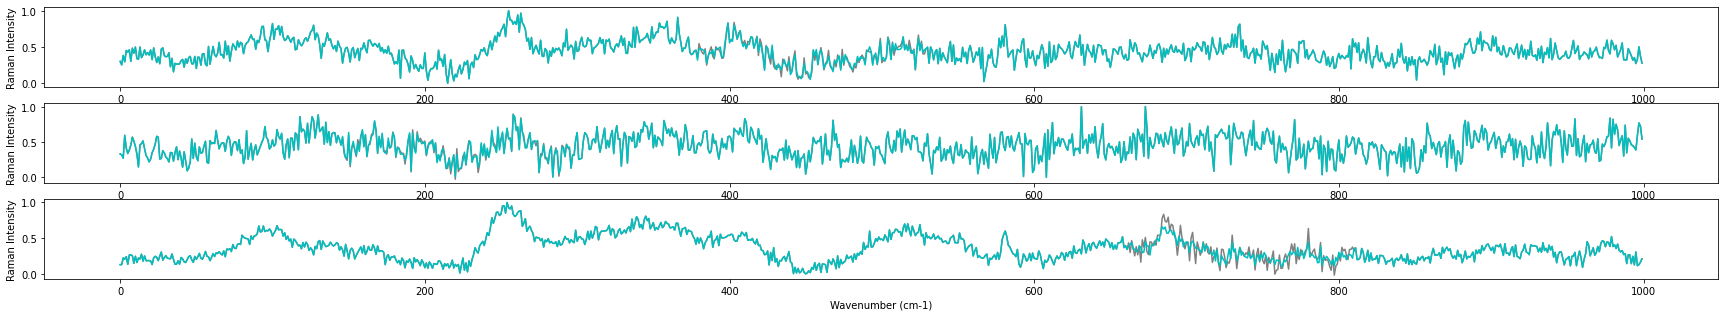

In [ ]:
# Mostramos algunos ejemplos de cómo quedarían las muestras tras añadir el ruido
figure =plt.gcf()
figure.set_size_inches(30,5)

v_plot = np.random.randint(0, X_noise.shape[0], 3)

plt.subplot(311)
plt.xlabel('Wavenumber (cm-1)')
plt.ylabel('Raman Intensity')
plt.plot(X_noise[v_plot[0]], color='grey')
plt.plot(X_test2[v_plot[0]], color='c')

plt.subplot(312)
plt.xlabel('Wavenumber (cm-1)')
plt.ylabel('Raman Intensity')
plt.plot(X_noise[v_plot[1]], color='grey')
plt.plot(X_test2[v_plot[1]], color='c')

plt.subplot(313)
plt.xlabel('Wavenumber (cm-1)')
plt.ylabel('Raman Intensity')
plt.plot(X_noise[v_plot[2]], color='grey')
plt.plot(X_test2[v_plot[2]], color='c')

plt.show() 

### Predecimos con los datos con ruido

Generarmos distintos escenarios variando el intervalo de ruido y la amplitud del mismo para ver el comportamiento 

In [ ]:
range_inter = [0, 50, 100, 150]                             # longitud del intervalo. 
alpha_list = [0.1, 0.25, 0.40, 0.55, 0.70, 0.85, 1.0]       # Porcentaje sobre la diferencia del maximo a 1
df = pd.DataFrame(np.zeros((len(alpha_list), len(range_inter))),
                  index=alpha_list,
                  columns=range_inter)

In [ ]:
# Inicializamos la primera columna al valor de f1 para los datos de test del estudio.
df.loc[:][0]=f1_score(y_test2, y_test_pred, average='micro')

In [ ]:
df

,0,50,100,150
0.10,0.851333,0.0,0.0,0.0
0.25,0.851333,0.0,0.0,0.0
0.40,0.851333,0.0,0.0,0.0
0.55,0.851333,0.0,0.0,0.0
0.70,0.851333,0.0,0.0,0.0
0.85,0.851333,0.0,0.0,0.0
1.00,0.851333,0.0,0.0,0.0


In [ ]:
X_test_cnn = np.reshape(X_test2,(X_test2.shape[0],1000,1))
y_test_cnn = np.reshape(y_test2,(y_test2.shape[0],1))
y_t_cnn_c = keras.utils.to_categorical(y_test_cnn, n_classes)

In [ ]:
# Calculamos la medida de f1 para distintos valores de rango de intervalo y de alpha para ver el comportamiento.
for range_i in range_inter[1:]:
  for alpha in alpha_list:
    X_noise= X_test2.copy() # reiniciamos los datos con los originales de test del estudio
    X_noise = add_noise (X_noise, range_i, alpha)
    file_name= './data/X_noise_'+ str(range_i)+'_'+ str(alpha) +'.npy'
    np.save ( file_name ,X_noise)
    X_t_test_noise_cnn = np.reshape(X_noise,(X_test2.shape[0],1000,1))
    ypred_noise_c = model_cnn2.predict(X_t_test_noise_cnn)
    df.loc[alpha][range_i] = f1_score(y_test2, np.argmax(ypred_noise_c, axis=1), average='micro')


In [ ]:
df

,0,50,100,150
0.10,0.851333,0.850667,0.851000,0.850333
0.25,0.851333,0.850667,0.854333,0.852667
0.40,0.851333,0.845333,0.838000,0.846667
0.55,0.851333,0.835000,0.824667,0.827000
0.70,0.851333,0.826000,0.813667,0.806000
0.85,0.851333,0.809333,0.784000,0.763000
1.00,0.851333,0.784333,0.753000,0.729000


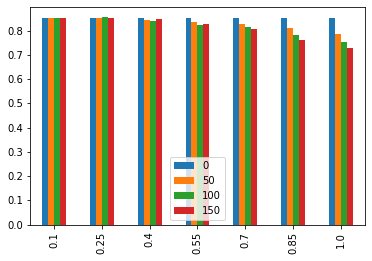

In [ ]:
# para cada valor de alpha, mostramos el resultado de f1 al variar el ancho del intervalo.
df.plot.bar();

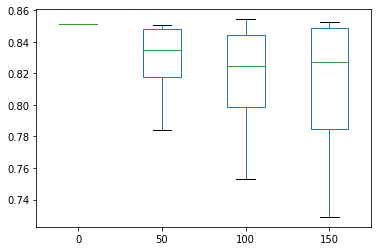

In [ ]:
# para cada ancho de intervalo, mostramos la variabilidad de f1
df.plot.box()

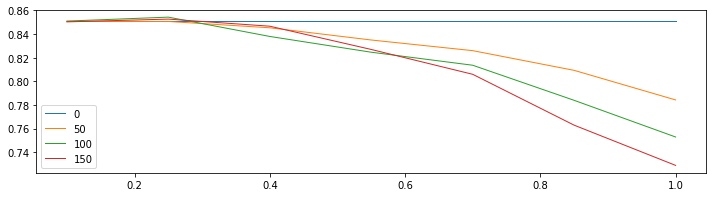

In [ ]:
# valores de f1 para cada valor de alpha y cada ancho de intervalo
df.plot.line(figsize=(12,3),lw=1);

Al igual que en con el modelo SVC + PCA se observa que la precisión disminuye según se aumenta el valor de alpha, ruido más intenso, y también al aumentar el intervalo durante el que se produce el ruido. 